C:\Users\Admin\AppData\Local\Temp\ipykernel_6908\3621520341.py:38: RuntimeWarning: Mean of empty slice.
  X[self.labels == i].mean(axis=0)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\_core\_methods.py:137: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


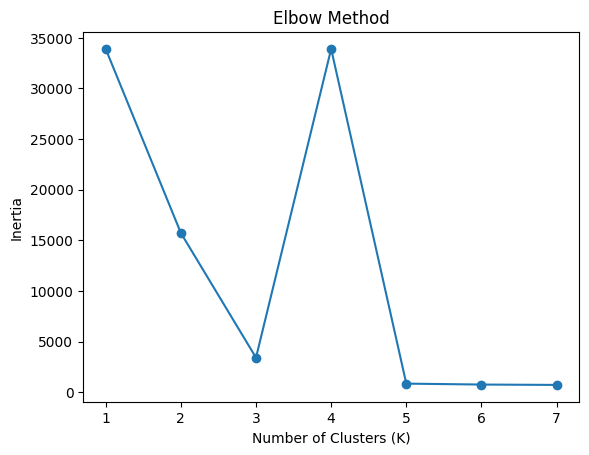

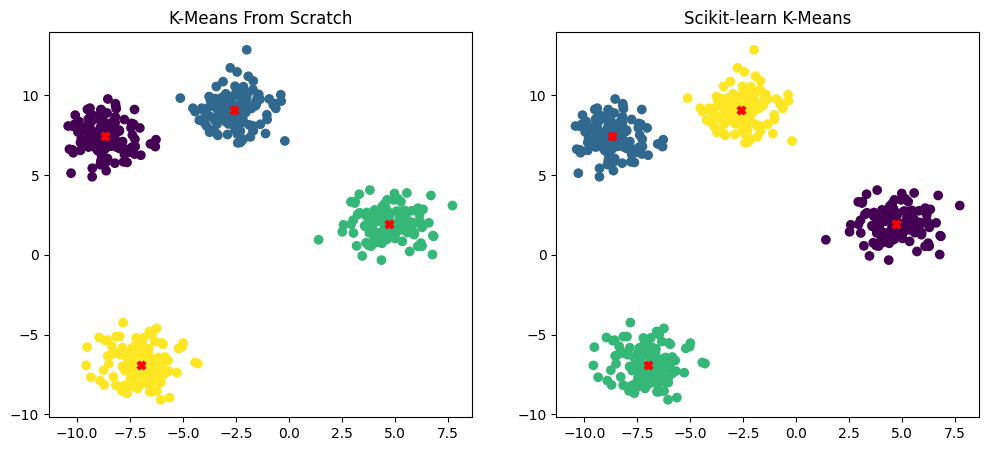

Custom K-Means Runtime: 0.002008199691772461
Scikit-learn K-Means Runtime: 2.9094183444976807


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from time import time

# -----------------------------
# Generate Synthetic Dataset
# -----------------------------
np.random.seed(42)
X, y_true = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

# -----------------------------
# K-Means from Scratch
# -----------------------------
class KMeansScratch:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, X):
        n_samples = X.shape[0]
        idx = np.random.choice(n_samples, self.k, replace=False)
        self.centroids = X[idx]

        for _ in range(self.max_iters):
            distances = np.linalg.norm(
                X[:, np.newaxis] - self.centroids, axis=2
            )
            self.labels = np.argmin(distances, axis=1)

            new_centroids = np.array([
                X[self.labels == i].mean(axis=0)
                for i in range(self.k)
            ])

            if np.all(self.centroids == new_centroids):
                break

            self.centroids = new_centroids

    def inertia(self, X):
        total = 0
        for i in range(self.k):
            total += np.sum(
                np.linalg.norm(X[self.labels == i] - self.centroids[i], axis=1) ** 2
            )
        return total

# -----------------------------
# Elbow Method
# -----------------------------
inertia_list = []
K_range = range(1, 8)

for k in K_range:
    model = KMeansScratch(k)
    model.fit(X)
    inertia_list.append(model.inertia(X))

plt.plot(K_range, inertia_list, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

# -----------------------------
# Train Custom K-Means
# -----------------------------
k = 4
start = time()
custom_kmeans = KMeansScratch(k)
custom_kmeans.fit(X)
custom_time = time() - start

# -----------------------------
# Train Scikit-learn K-Means
# -----------------------------
start = time()
sk_kmeans = KMeans(n_clusters=4, random_state=42)
sk_kmeans.fit(X)
sk_time = time() - start

# -----------------------------
# Visualization
# -----------------------------
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=custom_kmeans.labels, cmap='viridis')
plt.scatter(
    custom_kmeans.centroids[:, 0],
    custom_kmeans.centroids[:, 1],
    c='red',
    marker='X'
)
plt.title("K-Means From Scratch")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=sk_kmeans.labels_, cmap='viridis')
plt.scatter(
    sk_kmeans.cluster_centers_[:, 0],
    sk_kmeans.cluster_centers_[:, 1],
    c='red',
    marker='X'
)
plt.title("Scikit-learn K-Means")

plt.show()

# -----------------------------
# Performance Comparison
# -----------------------------
print("Custom K-Means Runtime:", custom_time)
print("Scikit-learn K-Means Runtime:", sk_time)